In [61]:
##ALL OF THE IMPORTS AND SUCH

from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm
import math
from numpy import genfromtxt
import colorcet as cc
import random
import aotools

import numpy as np
import scipy as sp

# plt.style.use('dark_background')
plt.style.use('default')

In [62]:
#Generate Colormap Intensity
cmap = np.zeros([256, 4])
cmap[:, 3] = np.linspace(0, 1, 256)
cmap[:, 0]= np.linspace(0, 0, 256)
cmap[:, 1]= np.linspace(0, 0, 256)
cmap[:, 2]= np.linspace(0, 0, 256)
#Intensity colours
imap = matplotlib.colors.ListedColormap(cmap)
#Phase colours
pmap= cc.m_CET_C6

Text(0, 0.5, 'Phase')

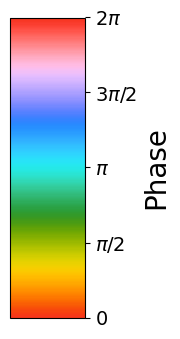

In [63]:
# Generate Phase colormap
import pylab as pl
import numpy as np

a = np.array([[0,1]])*2*np.pi
pl.figure(figsize=(3, 3))
img = pl.imshow(a, cmap=pmap)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.1, 0.25, 1])
# pl.colorbar(orientation="horizontal", cax=cax, ticks=[])
cbar = pl.colorbar(orientation='vertical', cax=cax, ticks=[0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
cbar.ax.tick_params(labelsize=14)

plt.ylabel('Phase', fontsize=20)
# pl.savefig("colorbar.png")
# pl.savefig('colorbar.svg', format='svg', bbox_inches='tight')

In [64]:
##These are custom functions for plotting the LightPipes beams with Phase and Intensity on the same plot, alternatively just the Intensity or just the Phase.

def plotbeam(F):
    I=1-Intensity(0,F)
    Phi=np.mod(Phase(F),2*pi)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(121)
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ax1.imshow(I,cmap=imap,vmin=np.min(I),vmax=np.max(I))
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    plt.tight_layout()

def plotint(F,norm=1):
    F=Normal(F)
    if norm==1:
        I=Intensity(1,F)
    else:
        I=Intensity(0,F)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(I,cmap='grey',vmin=0,vmax=norm)
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    plt.tight_layout()
    return I

In [65]:
#This is a function for making OAM beams, 

def OAM(state: int=0 ,phase=0):
    
    F=Begin(size,wavelength,N)

    if(state==0):
        F=GaussBeam(F, w0)
    else:
        F=GaussBeam(F, w0, doughnut=True, n=0,m=state)

    return F

In [66]:
# Setting constant values

pi = sp.constants.pi
c = sp.constants.speed_of_light

# Beam/lightpipes settings
# wavelength = 785*nm # our wavelength
# wavelength = 633*nm # Experimental wavelength from Klug paper
wavelength = 24.61564335*nm # Determined (approximate) numerical wavelength from Klug paper
# size = 30*cm # Size of window generated (original (ours))
size = 50*mm # Size of window generated example Klug (estimating)
# w0 = 3*cm # Beam waist (radius) (ours)
w0 = 6.67*mm # Beam waist Klug paper
# z = 5400 # Propagation distance (ours)
z = 100 # Klug paper example distance (metres)
N = 256 # Resolution
n = 3 # How many chunks we are dividing our distance into. ie how many phase screens

Fried parameter : 0.0018000000000691885

Rytov variance : 0.49999999997599903



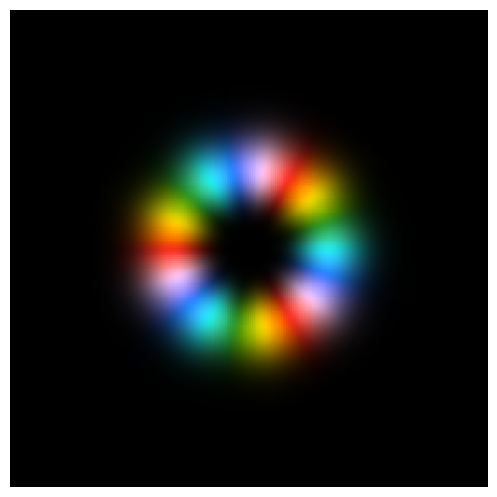

In [69]:
# Deterministic values

# C^2_n parameter. dependent on strength of turbulence
# we can always add more turbulence levels... maybe can set a distribution of some sorts?
# C2_n = {
#     'WeakerTurb' : 1e-18,
#     'WeakTurb' : 1e-17,
#     'MidWeakTurb' : 1e-16,
#     'MidTurb' : 1e-15,
#     'StrongTurb' : 1e-13 
# }

# # set turbulence strength
# turb_strength = 'MidWeakTurb'

C2_n_Klug = {
    'Weak' : 1.362285401e-14,
    'Medium' : 2.724e-14,
    'Strong' : 4.087e-14
}

turb_strength_Klug = 'Weak'
# Determine Fried parameter
# Currently all screens have the same Fried parameter
# Using Fried parameter as defined by Klug's Robust Structure Light in Atmospheric Turbulence Paper
# r0_i = pow(0.423*pow(2*pi/wavelength,2)*C2_n[turb_strength]*z,-3/5)
r0_i = pow(0.423*pow(2*pi/wavelength,2)*C2_n_Klug[turb_strength_Klug]*z,-3/5)

# Using Rytov variance as defined by Klug's Robust Structure Light in Atmospheric Turbulence Paper
sigma2_r = 1.23*C2_n_Klug[turb_strength_Klug]*pow(2*pi/wavelength,7/6)*pow(z,11/6)

print("Fried parameter : " + str(r0_i) + "\n")
print("Rytov variance : " + str(sigma2_r) + "\n")

# setting our beam as simple gaussian or oam with l dim
F = OAM(3)
plotbeam(F)
# plt.savefig('oam3_beam_init.svg', format='svg')

initial_phase = Phase(F)

LinAlgError: Could not invert Covariance Matrix to for A and B Matrices. Try with a larger pixel scale or smaller L0

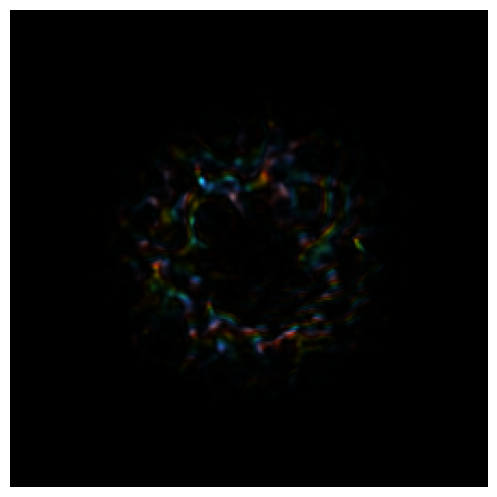

In [72]:
# propagating now
plotbeam(F)
for i in range(n):
    # phase=aotools.turbulence.phasescreen.ft_sh_phase_screen(r0_i,N,size/N,100,1*mm)
    phase = aotools.turbulence.infinitephasescreen.PhaseScreenKolmogorov(N,size/N,r0_i,100)

    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.mod(phase+np.min(phase),2*pi),cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    # plt.savefig('phase_screen_C_n_1e_13.svg', format='svg')

    print(np.max(Intensity(F)))
    F=SubPhase(F,Phase(F)+phase)
    F=Fresnel(F,z/n)

    plotbeam(F)

final_phase = Phase(F)
plotint(F)
# plt.savefig('oam3_beam_1e15.svg')